In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import itertools

# Data import

In [5]:
# IMPORTED OR DATASET GENERATED LAST?
use_import = False

# gets the last created filename (which is the latest dataset)
parent_dir = os.path.dirname('/Users/css/dev/thesis/selfish_mining_abm/notebooks')
search_dir = parent_dir + "/output/data/"
os.chdir(search_dir)
files = filter(os.path.isfile, os.listdir(search_dir))
files = [os.path.join(search_dir, f) for f in files]  # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))
path = files[::-1][0]
fname = os.path.basename(path)

imported_data_filename = "import.csv"
path_import = os.getcwd() + f"/{imported_data_filename}"

if use_import:
    fname = imported_data_filename
    data = pd.read_csv(filepath_or_buffer=path_import)
else:
    data = pd.read_csv(filepath_or_buffer=path)

data.head()

,Unnamed: 0,SimulationTime,CentralityMeasure,Topology,HashingPowerDistribution,Alpha,Gamma,TotalBlocks,SelfishBlocks,HonestBlocks,...,HonestMSB,MeanTimeHonestMainchainPropagation,MedianTimeHonestMainchainPropagation,MeanTimePropagation,MedianTimePropagation,GiniHashrate,GiniMainchain,GiniOffchain,GiniBoth,UniqueMinersMainchain
0,0,1000.0,RANDOM,UNIFORM,UNIFORM,0.0,0.0001,98.5,0.0,98.5,...,0.498168,0.000851,0.000842,0.000842,0.000839,0.328054,0.270621,0.000000,0.270621,54.7
1,1,1000.0,RANDOM,UNIFORM,UNIFORM,0.1,0.0001,103.3,10.6,92.7,...,0.110728,0.000846,0.000839,0.365932,0.000833,0.380914,0.260401,0.387691,0.312181,54.8
2,2,1000.0,RANDOM,UNIFORM,UNIFORM,0.2,0.0001,103.2,20.7,82.5,...,-0.424981,0.000848,0.000833,1.689180,0.000828,0.460468,0.317179,0.466456,0.385668,48.3
3,3,1000.0,RANDOM,UNIFORM,UNIFORM,0.3,0.0001,101.0,31.6,69.4,...,0.255609,0.000848,0.000835,3.234326,0.000823,0.522075,0.386881,0.445371,0.448588,40.2
4,4,1000.0,RANDOM,UNIFORM,UNIFORM,0.4,0.0001,100.1,41.6,58.5,...,-0.159193,0.000860,0.000845,7.180045,0.000827,0.584562,0.553064,0.268862,0.509584,27.1


In [3]:
print(list(data.columns.values)[1:])

['SimulationTime', 'CentralityMeasure', 'Topology', 'HashingPowerDistribution', 'Alpha', 'Gamma', 'TotalBlocks', 'SelfishBlocks', 'HonestBlocks', 'MainchainBlocks', 'OrphanBlocks', 'MainchainBlockRate', 'OrphanBlockRate', 'SelfishRevenue', 'HonestRevenue', 'RelativeSelfishRevenue', 'SelfishMSB', 'HonestMSB', 'MeanTimeHonestMainchainPropagation', 'MedianTimeHonestMainchainPropagation', 'MeanTimePropagation', 'MedianTimePropagation', 'GiniHashrate', 'GiniMainchain', 'GiniOffchain', 'GiniBoth', 'UniqueMinersMainchain']


# Parameter setup

In [4]:
alphas = data["Alpha"].unique()
gammas = data["Gamma"].unique()

centrality_measures = list(data["CentralityMeasure"].unique())
topologies = list(data["Topology"].unique())
hash_distributions = list(data["HashingPowerDistribution"].unique())

print("Centrality Measures: ", centrality_measures)
print("Topologies: ", topologies)
print("Hash Distributions: ", hash_distributions)

print("Alphas: ", alphas)
print("Gammas: ", gammas)

Centrality Measures:  ['RANDOM', 'BETWEENNESS', 'HASHING']
Topologies:  ['UNIFORM']
Hash Distributions:  ['UNIFORM']
Alphas:  [0.  0.1 0.2 0.3 0.4 0.5]
Gammas:  [1.00000000e-04 2.51188643e-03 6.30957344e-02 1.58489319e+00
 3.98107171e+01 1.00000000e+03]


# Plotting

## Orphan Block Rate

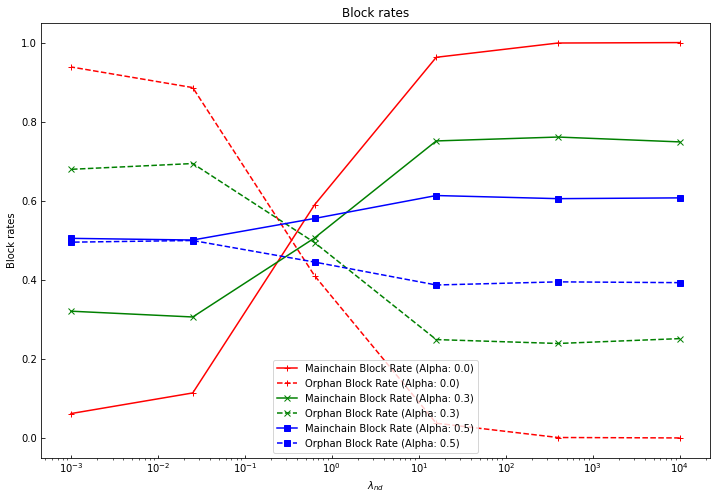

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[3], alphas[5]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.plot(
        1/filt["Gamma"],
        filt["MainchainBlockRate"],
        label=f"Mainchain Block Rate (Alpha: {np.round(alpha, 2)})",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
    axs.plot(
        1/filt["Gamma"],
        filt["OrphanBlockRate"],
        label=f"Orphan Block Rate (Alpha: {np.round(alpha, 2)})",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="--"
    )
axs.set_xscale("log")
axs.set_title("Block rates")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Block rates")
axs.tick_params(direction="in")
axs.legend()
plt.show()

In [ ]:
## main chain 

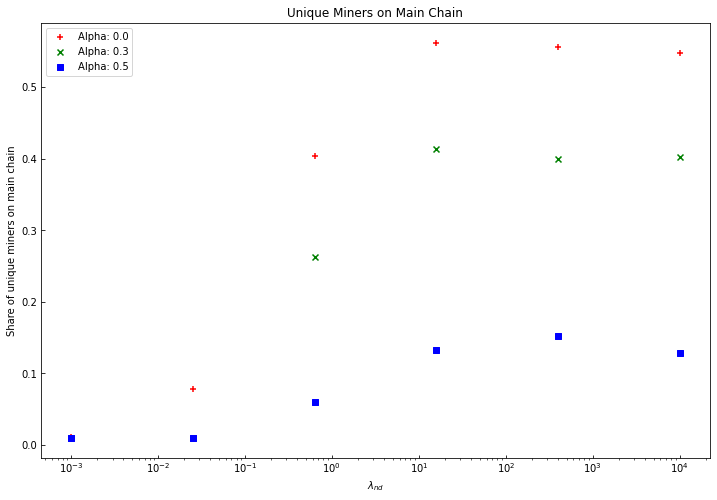

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[3], alphas[5]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.scatter(
        1/filt["Gamma"],
        filt["UniqueMinersMainchain"]/100,
        label=f"Alpha: {np.round(alpha, 2)}",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
axs.set_xscale("log")
axs.set_title("Unique Miners on Main Chain")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Share of unique miners on main chain")
axs.tick_params(direction="in")
axs.legend()
plt.show()

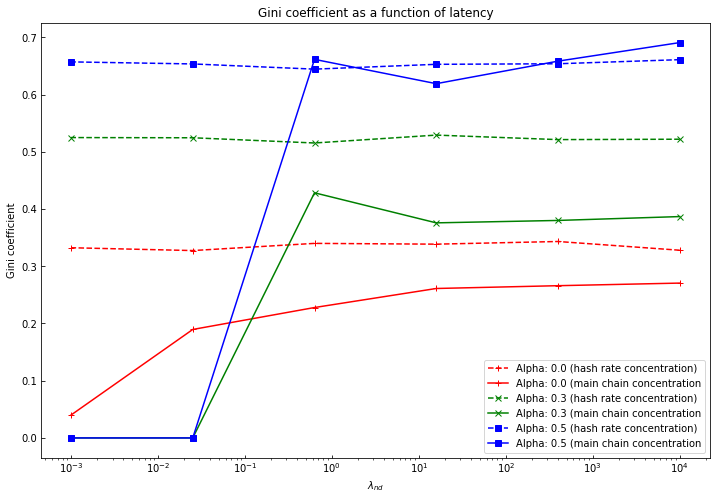

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[3], alphas[5]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.plot(
        1/filt["Gamma"],
        filt["GiniHashrate"],
        label=f"Alpha: {alpha} (hash rate concentration)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="--"
    )
    axs.plot(
        1/filt["Gamma"],
        filt["GiniMainchain"],
        label=f"Alpha: {alpha} (main chain concentration",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
axs.set_xscale("log")
axs.set_title("Gini coefficient as a function of latency")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Gini coefficient")
axs.tick_params(direction="in")
axs.legend()
plt.show()